In [28]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import expon

In [29]:
episodes = 1000
timesteps = 100
epsilon1 = 0.1
epsilon2 = 0.01
epsilon3 = 0

In [30]:

r1 = []
r2 = []
r3 = []

for _ in range(episodes):
    rewards1 = [0.0] * 6
    na1 = [0] * 6

    rewards2 = [0.0] * 6
    na2 = [0] * 6

    rewards3 = [0.0] * 6
    na3 = [0] * 6

    rew1 = 0.0
    rew2 = 0.0
    rew3 = 0.0

    for i in range(timesteps):
        num = random.uniform(0, 1)
        
        if num <= 0.1:
            arr1 = np.array(na1, dtype=float)
            ind1 = np.argmin(arr1)
        else:
            arr1 = np.array(rewards1, dtype=float)
            ind1 = np.argmax(arr1)

        if num <= 0.01:
            arr2 = np.array(na2, dtype=float)
            ind2 = np.argmin(arr2)
        else:
            arr2 = np.array(rewards2, dtype=float)
            ind2 = np.argmax(arr2)

        if num <= 0:
            arr3 = np.array(na3, dtype=float)
            ind3 = np.argmin(arr3)
        else:
            arr3 = np.array(rewards3, dtype=float)
            ind3 = np.argmax(arr3)

        arm1 = norm.rvs(0, 1)
        arm2 = np.random.choice([-4, 3])
        arm3 = poisson.rvs(2)
        arm4 = norm.rvs(1, 2)
        arm5 = expon.rvs(1)
        arm6 = np.random.choice([0, 1, 2, 3, 4])

        que = [arm1, arm2, arm3, arm4, arm5]

        if ind1 != 5:
            rew1 += que[ind1]
            rewards1[ind1] += que[ind1]
            na1[ind1] += 1
        else:
            rew1 += que[arm6]
            rewards1[5] += que[arm6]
            na1[5] += 1

        if ind2 != 5:
            rew2 += que[ind2]
            rewards2[ind2] += que[ind2]
            na2[ind2] += 1
        else:
            rew2 += que[arm6]
            rewards2[5] += que[arm6]
            na2[5] += 1

        if ind3 != 5:
            rew3 += que[ind3]
            rewards3[ind3] += que[ind3]
            na3[ind3] += 1
        else:
            rew3 += que[arm6]
            rewards3[5] += que[arm6]
            na3[5] += 1

    r1.append(rew1)
    r2.append(rew2)
    r3.append(rew3)



In [31]:
x = np.linspace(1, 1000, 1000)

print(r1)
print(r2)
print(r3)

[157.46179499144992, 192.47842693352953, 196.37183000726557, 189.23024461808424, 167.04128609108182, 96.32759992322423, 171.01357271409503, 164.914186981899, 138.36249340914458, 174.34302939728417, 189.02590149081684, 167.4743963135778, 183.93609815649293, 115.30259504745607, 142.52837913385505, 162.77676356651443, 174.6397817550969, 166.92489779085642, 180.73524188888166, 64.95080481136976, 177.53787305495248, 177.23623671166104, 155.17553969818692, 186.085550936398, 160.4386741183864, 185.46476408780484, 152.20060330378425, 103.0538195510113, 198.7455564531436, 202.61584828558964, 179.38154612478573, 60.75095561443644, 165.30444423579937, 164.74677081500067, 169.6086902799559, 111.65567569980736, 162.3507308410859, 176.22936304033504, 181.25846234763358, 165.2994844138479, 180.85165076504853, 34.22103635092223, 155.16949714812645, 194.00102751985216, 188.56756232929965, 180.07625738501747, 191.9595820469413, 168.18110414036218, 164.8997251837257, 177.13821738274538, 23.31542573267425

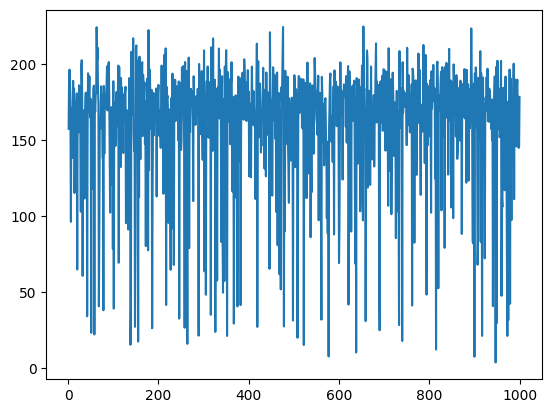

In [32]:
# For epsilon = 0.1
plt.plot(x, r1)
plt.show()

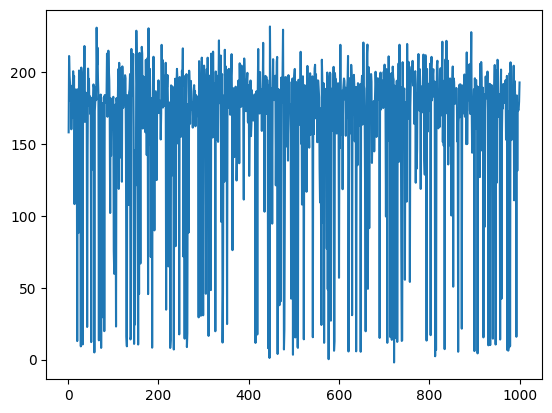

In [33]:
# For epsilon = 0.01
plt.plot(x, r2)
plt.show()

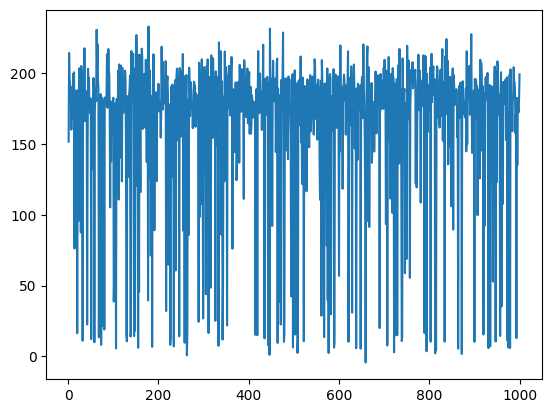

In [34]:
# For epsilon = 0
plt.plot(x, r3)
plt.show()

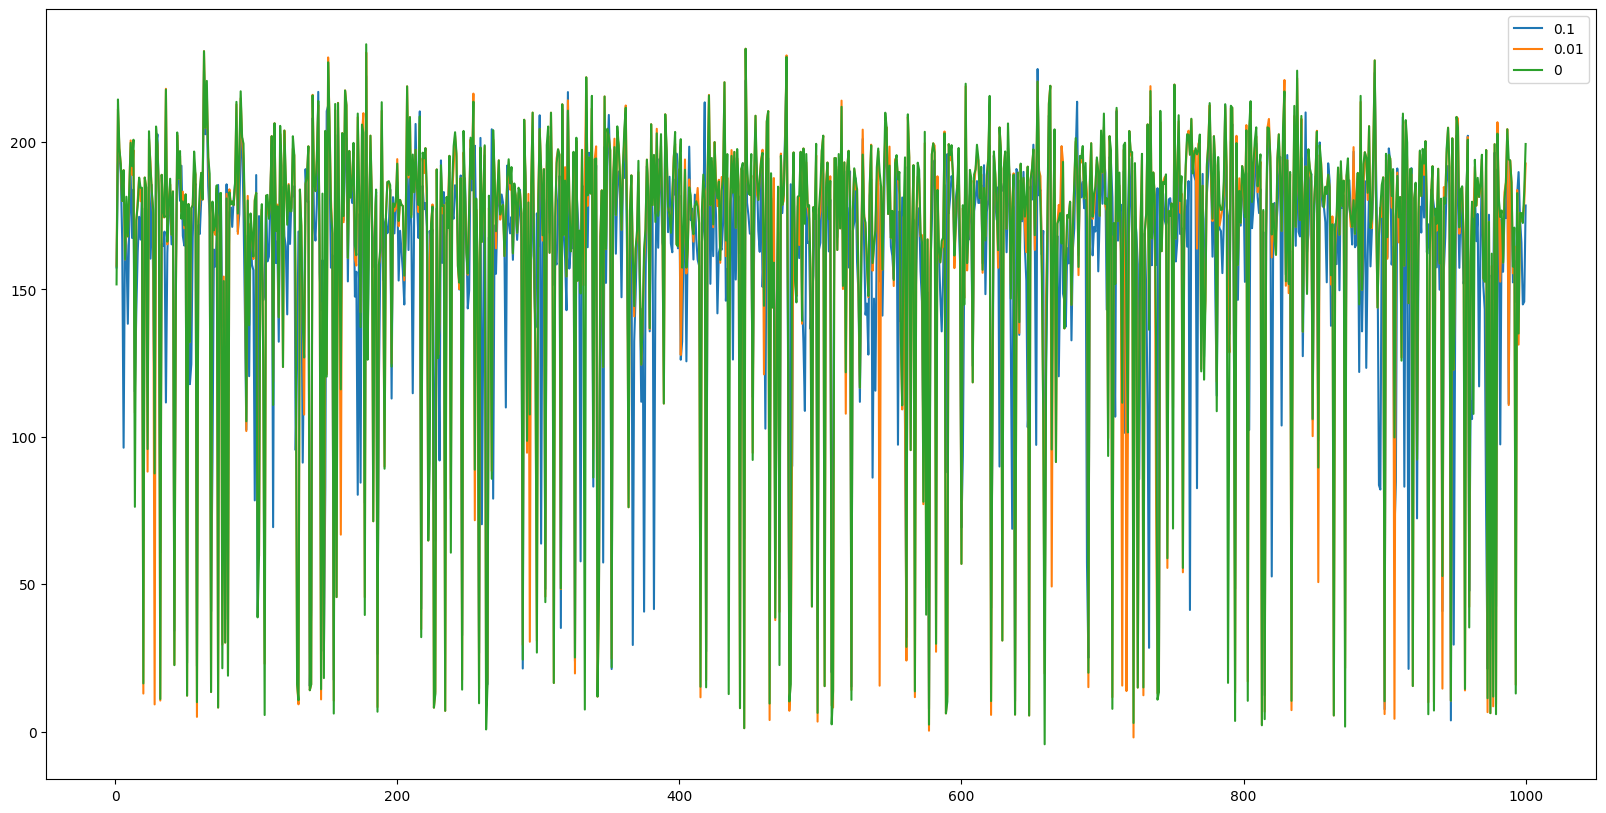

In [35]:
plt.figure(figsize=(20,10))
plt.plot(x, r1, label = "0.1")
plt.plot(x, r2, label = "0.01")
plt.plot(x, r3, label = "0")
plt.legend()
plt.show()